In [2]:
import numpy as np
import pandas as pd
import os
import csv
import cv2
import matplotlib.pyplot as plt
import pickle
import joblib

from sklearn.svm import SVC
from skimage.feature import hog
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score 
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix , accuracy_score, precision_score, recall_score, f1_score, roc_curve ,roc_auc_score,ConfusionMatrixDisplay

In [2]:
#Path of dataset
folder1="C:/Users/Aditya/Final Paper/Face recognition/Aditya"
folder2="C:/Users/Aditya/Final Paper/Face recognition/Rushikesh"
folder3="C:/Users/Aditya/Final Paper/Face recognition/Ranveer"

In [3]:
# Load the Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# List to store HOG features and class labels
hog_descs = []

# Loop through the images in folder1
for filename in os.listdir(folder1):
    img = cv2.imread(os.path.join(folder1, filename))
    if img is not None:
        # Face detection
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
        
        if len(faces) == 1:  # Assuming each image has exactly one face
            x, y, w, h = faces[0]
            face_img = img[y:y+h, x:x+w]

            # Resize the face region to 200x200
            resize = (200, 200)
            face_img = cv2.resize(face_img, resize)

            # Grayscaling the face region
            gray_face = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)

            # Apply Gaussian blur with kernel size 3x3
            blurred_face = cv2.GaussianBlur(gray_face, (3, 3), 0)

            # Extract HOG features
            fd, hog_image = hog(blurred_face, orientations=6, pixels_per_cell=(4, 4), transform_sqrt=True, cells_per_block=(1, 1), visualize=True)

            # Print the shape of the descriptor
            print("Descriptor shape for", filename, ":", fd.shape)

            # Append HOG features and class label to the lists
            hog_descs.append(fd)
           

# Convert the lists to a DataFrame
df = pd.DataFrame(hog_descs)
i = 0
df["Class"] = i

# Storing the data to a CSV file
csv_filename = "aditya.csv"
df.to_csv(csv_filename, index=False)

# Saving the feature descriptors and class labels to a numpy file

np.save("aditya.npy", df.to_numpy())

Descriptor shape for photo_1.jpg : (15000,)
Descriptor shape for photo_10.jpg : (15000,)
Descriptor shape for photo_100.jpg : (15000,)
Descriptor shape for photo_101.jpg : (15000,)
Descriptor shape for photo_102.jpg : (15000,)
Descriptor shape for photo_103.jpg : (15000,)
Descriptor shape for photo_104.jpg : (15000,)
Descriptor shape for photo_105.jpg : (15000,)
Descriptor shape for photo_106.jpg : (15000,)
Descriptor shape for photo_107.jpg : (15000,)
Descriptor shape for photo_108.jpg : (15000,)
Descriptor shape for photo_109.jpg : (15000,)
Descriptor shape for photo_11.jpg : (15000,)
Descriptor shape for photo_110.jpg : (15000,)
Descriptor shape for photo_111.jpg : (15000,)
Descriptor shape for photo_112.jpg : (15000,)
Descriptor shape for photo_113.jpg : (15000,)
Descriptor shape for photo_114.jpg : (15000,)
Descriptor shape for photo_115.jpg : (15000,)
Descriptor shape for photo_116.jpg : (15000,)
Descriptor shape for photo_117.jpg : (15000,)
Descriptor shape for photo_118.jpg : (

Descriptor shape for photo_266.jpg : (15000,)
Descriptor shape for photo_267.jpg : (15000,)
Descriptor shape for photo_268.jpg : (15000,)
Descriptor shape for photo_269.jpg : (15000,)
Descriptor shape for photo_27.jpg : (15000,)
Descriptor shape for photo_270.jpg : (15000,)
Descriptor shape for photo_271.jpg : (15000,)
Descriptor shape for photo_272.jpg : (15000,)
Descriptor shape for photo_273.jpg : (15000,)
Descriptor shape for photo_274.jpg : (15000,)
Descriptor shape for photo_275.jpg : (15000,)
Descriptor shape for photo_276.jpg : (15000,)
Descriptor shape for photo_277.jpg : (15000,)
Descriptor shape for photo_278.jpg : (15000,)
Descriptor shape for photo_279.jpg : (15000,)
Descriptor shape for photo_28.jpg : (15000,)
Descriptor shape for photo_280.jpg : (15000,)
Descriptor shape for photo_281.jpg : (15000,)
Descriptor shape for photo_282.jpg : (15000,)
Descriptor shape for photo_283.jpg : (15000,)
Descriptor shape for photo_284.jpg : (15000,)
Descriptor shape for photo_285.jpg :

In [4]:
# Load the Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# List to store HOG features and class labels
hog_descs = []


# Loop through the images in folder1
for filename in os.listdir(folder2):
    img = cv2.imread(os.path.join(folder2, filename))
    if img is not None:
        # Face detection
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
        
        if len(faces) == 1:  # Assuming each image has exactly one face
            x, y, w, h = faces[0]
            face_img = img[y:y+h, x:x+w]

            # Resize the face region to 200x200
            resize = (200, 200)
            face_img = cv2.resize(face_img, resize)

            # Grayscaling the face region
            gray_face = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)

            # Apply Gaussian blur with kernel size 3x3
            blurred_face = cv2.GaussianBlur(gray_face, (3, 3), 0)

            # Extract HOG features
            fd, hog_image = hog(blurred_face, orientations=6, pixels_per_cell=(4, 4), transform_sqrt=True, cells_per_block=(1, 1), visualize=True)

            # Print the shape of the descriptor
            print("Descriptor shape for", filename, ":", fd.shape)

            # Append HOG features and class label to the lists
            hog_descs.append(fd)
            

# Convert the lists to a DataFrame
df = pd.DataFrame(hog_descs)
i = 1
df["Class"] = i

# Storing the data to a CSV file
csv_filename = "rushikesh.csv"
df.to_csv(csv_filename, index=False,header=None)

# Saving the feature descriptors and class labels to a numpy file

np.save("rushikesh.npy", df.to_numpy())

Descriptor shape for photo_1.jpg : (15000,)
Descriptor shape for photo_10.jpg : (15000,)
Descriptor shape for photo_100.jpg : (15000,)
Descriptor shape for photo_101.jpg : (15000,)
Descriptor shape for photo_102.jpg : (15000,)
Descriptor shape for photo_103.jpg : (15000,)
Descriptor shape for photo_104.jpg : (15000,)
Descriptor shape for photo_105.jpg : (15000,)
Descriptor shape for photo_106.jpg : (15000,)
Descriptor shape for photo_107.jpg : (15000,)
Descriptor shape for photo_108.jpg : (15000,)
Descriptor shape for photo_109.jpg : (15000,)
Descriptor shape for photo_11.jpg : (15000,)
Descriptor shape for photo_110.jpg : (15000,)
Descriptor shape for photo_111.jpg : (15000,)
Descriptor shape for photo_112.jpg : (15000,)
Descriptor shape for photo_113.jpg : (15000,)
Descriptor shape for photo_114.jpg : (15000,)
Descriptor shape for photo_115.jpg : (15000,)
Descriptor shape for photo_116.jpg : (15000,)
Descriptor shape for photo_117.jpg : (15000,)
Descriptor shape for photo_118.jpg : (

Descriptor shape for photo_273.jpg : (15000,)
Descriptor shape for photo_274.jpg : (15000,)
Descriptor shape for photo_275.jpg : (15000,)
Descriptor shape for photo_276.jpg : (15000,)
Descriptor shape for photo_277.jpg : (15000,)
Descriptor shape for photo_278.jpg : (15000,)
Descriptor shape for photo_279.jpg : (15000,)
Descriptor shape for photo_28.jpg : (15000,)
Descriptor shape for photo_280.jpg : (15000,)
Descriptor shape for photo_281.jpg : (15000,)
Descriptor shape for photo_282.jpg : (15000,)
Descriptor shape for photo_283.jpg : (15000,)
Descriptor shape for photo_284.jpg : (15000,)
Descriptor shape for photo_285.jpg : (15000,)
Descriptor shape for photo_286.jpg : (15000,)
Descriptor shape for photo_287.jpg : (15000,)
Descriptor shape for photo_288.jpg : (15000,)
Descriptor shape for photo_289.jpg : (15000,)
Descriptor shape for photo_29.jpg : (15000,)
Descriptor shape for photo_290.jpg : (15000,)
Descriptor shape for photo_291.jpg : (15000,)
Descriptor shape for photo_292.jpg :

In [5]:
# Load the Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# List to store HOG features and class labels
hog_descs = []


# Loop through the images in folder1
for filename in os.listdir(folder3):
    img = cv2.imread(os.path.join(folder3, filename))
    if img is not None:
        # Face detection
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
        
        if len(faces) == 1:  # Assuming each image has exactly one face
            x, y, w, h = faces[0]
            face_img = img[y:y+h, x:x+w]

            # Resize the face region to 200x200
            resize = (200, 200)
            face_img = cv2.resize(face_img, resize)

            # Grayscaling the face region
            gray_face = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)

            # Apply Gaussian blur with kernel size 3x3
            blurred_face = cv2.GaussianBlur(gray_face, (3, 3), 0)

            # Extract HOG features
            fd, hog_image = hog(blurred_face, orientations=6, pixels_per_cell=(4, 4), transform_sqrt=True, cells_per_block=(1, 1), visualize=True)

            # Print the shape of the descriptor
            print("Descriptor shape for", filename, ":", fd.shape)

            # Append HOG features and class label to the lists
            hog_descs.append(fd)
            

# Convert the lists to a DataFrame
df = pd.DataFrame(hog_descs)
i = 2
df["Class"] = i

# Storing the data to a CSV file
csv_filename = "ranveer.csv"
df.to_csv(csv_filename, index=False,header=None)

# Saving the feature descriptors and class labels to a numpy file

np.save("ranveer.npy", df.to_numpy())

Descriptor shape for photo_1.jpg : (15000,)
Descriptor shape for photo_10.jpg : (15000,)
Descriptor shape for photo_100.jpg : (15000,)
Descriptor shape for photo_101.jpg : (15000,)
Descriptor shape for photo_102.jpg : (15000,)
Descriptor shape for photo_103.jpg : (15000,)
Descriptor shape for photo_104.jpg : (15000,)
Descriptor shape for photo_105.jpg : (15000,)
Descriptor shape for photo_106.jpg : (15000,)
Descriptor shape for photo_107.jpg : (15000,)
Descriptor shape for photo_108.jpg : (15000,)
Descriptor shape for photo_109.jpg : (15000,)
Descriptor shape for photo_11.jpg : (15000,)
Descriptor shape for photo_110.jpg : (15000,)
Descriptor shape for photo_111.jpg : (15000,)
Descriptor shape for photo_112.jpg : (15000,)
Descriptor shape for photo_113.jpg : (15000,)
Descriptor shape for photo_114.jpg : (15000,)
Descriptor shape for photo_115.jpg : (15000,)
Descriptor shape for photo_116.jpg : (15000,)
Descriptor shape for photo_117.jpg : (15000,)
Descriptor shape for photo_118.jpg : (

Descriptor shape for photo_262.jpg : (15000,)
Descriptor shape for photo_263.jpg : (15000,)
Descriptor shape for photo_264.jpg : (15000,)
Descriptor shape for photo_265.jpg : (15000,)
Descriptor shape for photo_266.jpg : (15000,)
Descriptor shape for photo_267.jpg : (15000,)
Descriptor shape for photo_268.jpg : (15000,)
Descriptor shape for photo_269.jpg : (15000,)
Descriptor shape for photo_27.jpg : (15000,)
Descriptor shape for photo_270.jpg : (15000,)
Descriptor shape for photo_271.jpg : (15000,)
Descriptor shape for photo_272.jpg : (15000,)
Descriptor shape for photo_273.jpg : (15000,)
Descriptor shape for photo_274.jpg : (15000,)
Descriptor shape for photo_275.jpg : (15000,)
Descriptor shape for photo_276.jpg : (15000,)
Descriptor shape for photo_277.jpg : (15000,)
Descriptor shape for photo_278.jpg : (15000,)
Descriptor shape for photo_279.jpg : (15000,)
Descriptor shape for photo_28.jpg : (15000,)
Descriptor shape for photo_280.jpg : (15000,)
Descriptor shape for photo_281.jpg :

In [6]:
aditya_array = np.load('aditya.npy')
rushikesh_array = np.load('rushikesh.npy')
ranveer_array=np.load("ranveer.npy")

In [7]:
concatenated_array = np.concatenate((aditya_array,rushikesh_array,ranveer_array), axis=0)

In [8]:
concatenated_array

array([[0.45147659, 0.45147659, 0.        , ..., 0.50390597, 0.50390597,
        0.        ],
       [0.51226154, 0.        , 0.        , ..., 0.5       , 0.5       ,
        0.        ],
       [0.42333231, 0.56228841, 0.19389543, ..., 0.27518787, 0.42008333,
        0.        ],
       ...,
       [0.53170011, 0.38972425, 0.53170011, ..., 0.5011916 , 0.49640804,
        2.        ],
       [0.89092797, 0.        , 0.        , ..., 0.54629715, 0.3235402 ,
        2.        ],
       [0.89092797, 0.        , 0.        , ..., 0.54629715, 0.3235402 ,
        2.        ]])

In [9]:
x = concatenated_array[:, :15000]   # selects columns up to 15000 for x
y = concatenated_array[:, -1]  

In [10]:
x

array([[0.45147659, 0.45147659, 0.        , ..., 0.50390597, 0.50390597,
        0.50390597],
       [0.51226154, 0.        , 0.        , ..., 0.5       , 0.5       ,
        0.5       ],
       [0.42333231, 0.56228841, 0.19389543, ..., 0.39707164, 0.27518787,
        0.42008333],
       ...,
       [0.53170011, 0.38972425, 0.53170011, ..., 0.5011916 , 0.5011916 ,
        0.49640804],
       [0.89092797, 0.        , 0.        , ..., 0.54629715, 0.54629715,
        0.3235402 ],
       [0.89092797, 0.        , 0.        , ..., 0.54629715, 0.54629715,
        0.3235402 ]])

In [11]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [12]:
y = y.astype(np.int32)

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [14]:
print(x.shape)  # prints the shape of x
print(y.shape)  # prints the shape of y

(868, 15000)
(868,)


[1.85137936e-01 7.81754437e-02 2.74261859e-02 2.14165678e-02
 1.82125600e-02 1.74925970e-02 1.49185521e-02 1.40938909e-02
 1.28058600e-02 1.19005458e-02 1.01690935e-02 9.68045074e-03
 8.46686589e-03 8.29994805e-03 7.56714485e-03 7.40641725e-03
 6.32372922e-03 5.90411254e-03 5.64297996e-03 5.35189919e-03
 5.05156804e-03 4.71894882e-03 4.54714498e-03 4.50773219e-03
 4.13803352e-03 3.97542770e-03 3.89473456e-03 3.84005468e-03
 3.76385008e-03 3.63438663e-03 3.56797253e-03 3.52778394e-03
 3.43308959e-03 3.29421456e-03 3.22261615e-03 3.13966878e-03
 3.04325392e-03 3.02293520e-03 3.00545202e-03 2.94315228e-03
 2.93639884e-03 2.86502933e-03 2.85000759e-03 2.78377243e-03
 2.76928326e-03 2.74842551e-03 2.71235658e-03 2.66107478e-03
 2.62741420e-03 2.56405495e-03 2.55890864e-03 2.52255292e-03
 2.49535361e-03 2.45385330e-03 2.44952216e-03 2.41061960e-03
 2.38150484e-03 2.36546096e-03 2.35099804e-03 2.33540600e-03
 2.28828499e-03 2.26378333e-03 2.25637480e-03 2.24862993e-03
 2.23176172e-03 2.205660

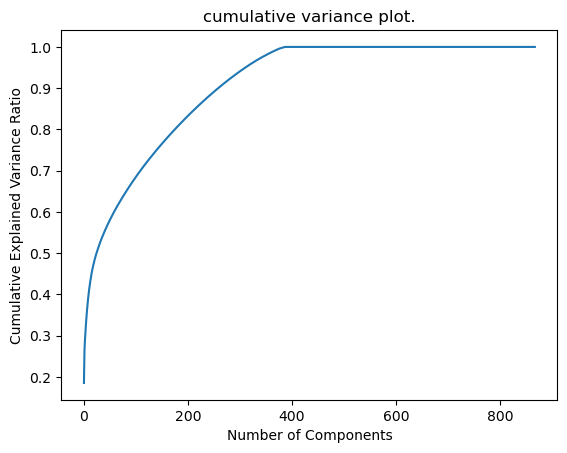

In [15]:
from sklearn.decomposition import PCA
# Create a PCA object
pca = PCA()

# Fit the PCA model to the HOG features
pca.fit(x)

# Calculate the cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_)

# Plot the explained variance ratio against number of components
plt.plot(cumulative_var_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('cumulative variance plot.')
plt.show()

In [16]:
B = pca.transform(x)
B = pd.DataFrame(B)
B 

,0,1,2,3,4,5,6,7,8,9,...,858,859,860,861,862,863,864,865,866,867
0,-11.712239,-9.982430,-2.846578,-7.624861,-1.036133,1.222824,0.184295,0.172060,-3.528193,4.250165,...,-3.209238e-17,2.324529e-16,3.453184e-17,-3.308985e-16,-2.602085e-17,-1.188719e-15,-3.027092e-16,-8.456777e-17,1.045171e-16,-3.252607e-16
1,-11.793494,-10.633509,-3.260722,-8.228276,-1.083862,2.180847,-0.858553,-0.672417,-3.869241,4.105324,...,-6.071532e-18,-7.697835e-16,4.137315e-16,1.058181e-16,3.035766e-16,-6.119237e-16,6.273194e-16,-4.052206e-16,-4.091779e-15,7.625194e-16
2,-11.602051,-6.150130,2.307798,-4.671769,3.817068,-8.211757,8.449028,2.241191,0.706454,-4.535687,...,-2.359224e-16,-1.817123e-16,-3.263449e-16,-3.491131e-16,-2.775558e-17,-1.859624e-15,-2.931683e-16,5.724587e-17,1.257675e-16,2.503206e-15
3,-11.602051,-6.150130,2.307798,-4.671769,3.817068,-8.211757,8.449028,2.241191,0.706454,-4.535687,...,-2.359224e-16,-1.817123e-16,-3.263449e-16,-3.491131e-16,-2.775558e-17,-1.859624e-15,-2.931683e-16,5.724587e-17,1.257675e-16,2.503206e-15
4,-10.714268,-5.740129,2.245202,-4.660726,3.786320,-7.584740,7.948169,2.736325,2.380552,-4.776562,...,-1.994932e-16,4.575333e-16,-2.515349e-16,-3.538836e-16,-7.424616e-16,5.013351e-16,1.084202e-16,6.218984e-16,-1.197393e-15,1.457168e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,14.226069,-1.698978,-1.738669,0.016441,-3.002949,0.492742,4.717850,-10.596985,0.796076,-1.857642,...,-2.298509e-16,-5.811324e-17,3.217912e-16,-1.335737e-16,-3.707971e-16,2.619432e-16,2.881809e-16,-8.196568e-16,-8.439430e-16,1.733639e-16
864,14.226069,-1.698978,-1.738669,0.016441,-3.002949,0.492742,4.717850,-10.596985,0.796076,-1.857642,...,-2.298509e-16,-5.811324e-17,3.217912e-16,-1.335737e-16,-3.707971e-16,2.619432e-16,2.881809e-16,-8.196568e-16,-8.439430e-16,1.733639e-16
865,14.226069,-1.698978,-1.738669,0.016441,-3.002949,0.492742,4.717850,-10.596985,0.796076,-1.857642,...,-2.298509e-16,-5.811324e-17,3.217912e-16,-1.335737e-16,-3.707971e-16,2.619432e-16,2.881809e-16,-8.196568e-16,-8.439430e-16,1.733639e-16
866,15.603387,-1.830765,-0.393793,-0.585499,-0.082202,-0.801954,0.473524,-0.624114,-0.022902,0.282652,...,6.071532e-17,1.381274e-16,-2.953367e-16,2.550044e-16,2.424276e-16,-4.776995e-16,3.874939e-16,3.630993e-16,4.683753e-16,-1.627171e-15


In [17]:
pca = PCA(n_components=100)
pca.fit(x)

PCA(n_components=100)

In [18]:
# save the model to disk
import joblib
filename = 'PCA_model.sav'
pickle.dump(pca, open(filename, 'wb'))

In [19]:
B = pca.transform(x)
B = pd.DataFrame(B)
B 

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-11.712239,-9.982430,-2.846579,-7.624866,-1.036109,1.222797,0.184268,0.172057,-3.528093,4.250356,...,-0.330344,-0.102149,-0.151013,0.316129,-0.119492,0.450656,-0.175639,0.057483,0.881284,-0.357814
1,-11.793494,-10.633509,-3.260721,-8.228295,-1.083870,2.180913,-0.858431,-0.672454,-3.869156,4.105060,...,0.704123,0.223512,0.353268,0.057644,-1.008524,-0.452458,0.235464,-0.390324,-0.017329,-0.324556
2,-11.602051,-6.150130,2.307806,-4.671781,3.816998,-8.211734,8.449040,2.241279,0.706520,-4.536350,...,2.857808,1.689326,1.134751,-2.951342,0.543042,1.574843,0.243266,-0.402710,-2.745114,3.528767
3,-11.602051,-6.150130,2.307806,-4.671781,3.816998,-8.211734,8.449040,2.241279,0.706520,-4.536350,...,2.857808,1.689326,1.134751,-2.951342,0.543042,1.574843,0.243266,-0.402710,-2.745114,3.528767
4,-10.714268,-5.740129,2.245196,-4.660752,3.786306,-7.584634,7.948006,2.736433,2.380255,-4.776374,...,0.156031,-0.027048,1.085113,-0.166616,1.299356,-2.857963,-0.880034,-2.125305,-2.334236,-2.015630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,14.226069,-1.698978,-1.738665,0.016419,-3.002978,0.492738,4.717840,-10.596995,0.796163,-1.857779,...,0.193706,0.096062,0.689497,0.479304,-0.447512,0.116056,0.508218,0.075451,0.629013,-0.328964
864,14.226069,-1.698978,-1.738665,0.016419,-3.002978,0.492738,4.717840,-10.596995,0.796163,-1.857779,...,0.193706,0.096062,0.689497,0.479304,-0.447512,0.116056,0.508218,0.075451,0.629013,-0.328964
865,14.226069,-1.698978,-1.738665,0.016419,-3.002978,0.492738,4.717840,-10.596995,0.796163,-1.857779,...,0.193706,0.096062,0.689497,0.479304,-0.447512,0.116056,0.508218,0.075451,0.629013,-0.328964
866,15.603387,-1.830765,-0.393796,-0.585491,-0.082153,-0.801929,0.473463,-0.624161,-0.022892,0.282508,...,0.732555,0.685013,0.838208,0.178281,-0.938580,0.154281,-1.179074,0.970378,0.596750,1.429025


In [20]:
#Concatinate the Class ID's 
B=pd.concat([B, pd.DataFrame(y)],axis=1)
B

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,0
0,-11.712239,-9.982430,-2.846579,-7.624866,-1.036109,1.222797,0.184268,0.172057,-3.528093,4.250356,...,-0.102149,-0.151013,0.316129,-0.119492,0.450656,-0.175639,0.057483,0.881284,-0.357814,0
1,-11.793494,-10.633509,-3.260721,-8.228295,-1.083870,2.180913,-0.858431,-0.672454,-3.869156,4.105060,...,0.223512,0.353268,0.057644,-1.008524,-0.452458,0.235464,-0.390324,-0.017329,-0.324556,0
2,-11.602051,-6.150130,2.307806,-4.671781,3.816998,-8.211734,8.449040,2.241279,0.706520,-4.536350,...,1.689326,1.134751,-2.951342,0.543042,1.574843,0.243266,-0.402710,-2.745114,3.528767,0
3,-11.602051,-6.150130,2.307806,-4.671781,3.816998,-8.211734,8.449040,2.241279,0.706520,-4.536350,...,1.689326,1.134751,-2.951342,0.543042,1.574843,0.243266,-0.402710,-2.745114,3.528767,0
4,-10.714268,-5.740129,2.245196,-4.660752,3.786306,-7.584634,7.948006,2.736433,2.380255,-4.776374,...,-0.027048,1.085113,-0.166616,1.299356,-2.857963,-0.880034,-2.125305,-2.334236,-2.015630,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,14.226069,-1.698978,-1.738665,0.016419,-3.002978,0.492738,4.717840,-10.596995,0.796163,-1.857779,...,0.096062,0.689497,0.479304,-0.447512,0.116056,0.508218,0.075451,0.629013,-0.328964,2
864,14.226069,-1.698978,-1.738665,0.016419,-3.002978,0.492738,4.717840,-10.596995,0.796163,-1.857779,...,0.096062,0.689497,0.479304,-0.447512,0.116056,0.508218,0.075451,0.629013,-0.328964,2
865,14.226069,-1.698978,-1.738665,0.016419,-3.002978,0.492738,4.717840,-10.596995,0.796163,-1.857779,...,0.096062,0.689497,0.479304,-0.447512,0.116056,0.508218,0.075451,0.629013,-0.328964,2
866,15.603387,-1.830765,-0.393796,-0.585491,-0.082153,-0.801929,0.473463,-0.624161,-0.022892,0.282508,...,0.685013,0.838208,0.178281,-0.938580,0.154281,-1.179074,0.970378,0.596750,1.429025,2


In [21]:
#Creating Final Feature File after applying PCA 
csv_data1=B.to_csv('Final_HOG_Feature.csv', mode='w',header=False,index=False)

In [22]:
# Reading recently saved file
train_data = pd.read_csv('Final_HOG_Feature.csv',header=None)

In [23]:
#Check for NaN under a single DataFrame column
train_data.isnull().values.any()

False

In [24]:
X = train_data.drop(columns= 100, axis=1)

In [25]:
X

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-11.712239,-9.982430,-2.846579,-7.624866,-1.036109,1.222797,0.184268,0.172057,-3.528093,4.250356,...,-0.330344,-0.102149,-0.151013,0.316129,-0.119492,0.450656,-0.175639,0.057483,0.881284,-0.357814
1,-11.793494,-10.633509,-3.260721,-8.228295,-1.083870,2.180913,-0.858431,-0.672454,-3.869156,4.105060,...,0.704123,0.223512,0.353268,0.057644,-1.008524,-0.452458,0.235464,-0.390324,-0.017329,-0.324556
2,-11.602051,-6.150130,2.307806,-4.671781,3.816998,-8.211734,8.449040,2.241279,0.706520,-4.536350,...,2.857808,1.689326,1.134751,-2.951342,0.543042,1.574843,0.243266,-0.402710,-2.745114,3.528767
3,-11.602051,-6.150130,2.307806,-4.671781,3.816998,-8.211734,8.449040,2.241279,0.706520,-4.536350,...,2.857808,1.689326,1.134751,-2.951342,0.543042,1.574843,0.243266,-0.402710,-2.745114,3.528767
4,-10.714268,-5.740129,2.245196,-4.660752,3.786306,-7.584634,7.948006,2.736433,2.380255,-4.776374,...,0.156031,-0.027048,1.085113,-0.166616,1.299356,-2.857963,-0.880034,-2.125305,-2.334236,-2.015630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,14.226069,-1.698978,-1.738665,0.016419,-3.002978,0.492738,4.717840,-10.596995,0.796163,-1.857779,...,0.193706,0.096062,0.689497,0.479304,-0.447512,0.116056,0.508218,0.075451,0.629013,-0.328964
864,14.226069,-1.698978,-1.738665,0.016419,-3.002978,0.492738,4.717840,-10.596995,0.796163,-1.857779,...,0.193706,0.096062,0.689497,0.479304,-0.447512,0.116056,0.508218,0.075451,0.629013,-0.328964
865,14.226069,-1.698978,-1.738665,0.016419,-3.002978,0.492738,4.717840,-10.596995,0.796163,-1.857779,...,0.193706,0.096062,0.689497,0.479304,-0.447512,0.116056,0.508218,0.075451,0.629013,-0.328964
866,15.603387,-1.830765,-0.393796,-0.585491,-0.082153,-0.801929,0.473463,-0.624161,-0.022892,0.282508,...,0.732555,0.685013,0.838208,0.178281,-0.938580,0.154281,-1.179074,0.970378,0.596750,1.429025


In [26]:
Y  = train_data[100]

In [27]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
863    2
864    2
865    2
866    2
867    2
Name: 100, Length: 868, dtype: int64

In [28]:
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

k = 5
kf = KFold(n_splits=k, random_state=None)
model_LR = LogisticRegression(solver='liblinear')

acc_score = []
precision_score = []
recall_score = []
f1_score = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = Y[train_index], Y[test_index]

    model_LR.fit(X_train, y_train)
    pred_values = model_LR.predict(X_test)

    acc = accuracy_score(pred_values, y_test)
    acc_score.append(acc)

    precision, recall, f1, _ = precision_recall_fscore_support(y_test, pred_values, average='weighted',zero_division=1)
    precision_score.append(precision)
    recall_score.append(recall)
    f1_score.append(f1)

avg_acc_score = np.mean(acc_score)
avg_precision_score = np.mean(precision_score)
avg_recall_score = np.mean(recall_score)
avg_f1_score = np.mean(f1_score)

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
print('Avg precision : {}'.format(avg_precision_score))
print('Avg recall : {}'.format(avg_recall_score))
print('Avg f1 score : {}'.format(avg_f1_score))

accuracy of each fold - [1.0, 1.0, 0.9770114942528736, 1.0, 1.0]
Avg accuracy : 0.9954022988505746
Avg precision : 1.0
Avg recall : 0.9954022988505746
Avg f1 score : 0.9976744186046511


In [29]:
k = 5
kf = KFold(n_splits=k, random_state=None)
model_RF = RandomForestClassifier()

acc_score = []
precision_score = []
recall_score = []
f1_score = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = Y[train_index], Y[test_index]

    model_RF.fit(X_train, y_train)
    pred_values = model_RF.predict(X_test)

    acc = accuracy_score(pred_values, y_test)
    acc_score.append(acc)

    precision, recall, f1, _ = precision_recall_fscore_support(y_test, pred_values, average='weighted',zero_division=1)
    precision_score.append(precision)
    recall_score.append(recall)
    f1_score.append(f1)

avg_acc_score = np.mean(acc_score)
avg_precision_score = np.mean(precision_score)
avg_recall_score = np.mean(recall_score)
avg_f1_score = np.mean(f1_score)

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
print('Avg precision : {}'.format(avg_precision_score))
print('Avg recall : {}'.format(avg_recall_score))
print('Avg f1 score : {}'.format(avg_f1_score))

accuracy of each fold - [1.0, 0.9885057471264368, 0.9885057471264368, 1.0, 1.0]
Avg accuracy : 0.9954022988505746
Avg precision : 0.9977729885057471
Avg recall : 0.9954022988505746
Avg f1 score : 0.9965529697241877


In [30]:
k = 5
kf = KFold(n_splits=k, random_state=None)
model_RF = RandomForestClassifier()

acc_score = []
precision_score = []
recall_score = []
f1_score = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = Y[train_index], Y[test_index]

    model_RF.fit(X_train, y_train)
    pred_values = model_RF.predict(X_test)

    acc = accuracy_score(pred_values, y_test)
    acc_score.append(acc)

    precision, recall, f1, _ = precision_recall_fscore_support(y_test, pred_values, average='weighted', zero_division=1)
    precision_score.append(precision)
    recall_score.append(recall)
    f1_score.append(f1)

avg_acc_score = np.mean(acc_score)
avg_precision_score = np.mean(precision_score)
avg_recall_score = np.mean(recall_score)
avg_f1_score = np.mean(f1_score)

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
print('Avg precision : {}'.format(avg_precision_score))
print('Avg recall : {}'.format(avg_recall_score))
print('Avg f1 score : {}'.format(avg_f1_score))

# Save the trained Random Forest model to a file
model_filename = 'RandomForest_model.sav'
joblib.dump(model_RF, model_filename)

accuracy of each fold - [1.0, 1.0, 1.0, 1.0, 1.0]
Avg accuracy : 1.0
Avg precision : 1.0
Avg recall : 1.0
Avg f1 score : 1.0


['RandomForest_model.sav']

In [31]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

k = 5
kf = KFold(n_splits=k, random_state=None)
model_knn = KNeighborsClassifier()

acc_score = []
precision_score = []
recall_score = []
f1_score = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = Y[train_index], Y[test_index]

    model_knn.fit(X_train, y_train)
    pred_values = model_knn.predict(X_test)

    acc = accuracy_score(pred_values, y_test)
    acc_score.append(acc)

    precision, recall, f1, _ = precision_recall_fscore_support(y_test, pred_values, average='weighted',zero_division=1)
    precision_score.append(precision)
    recall_score.append(recall)
    f1_score.append(f1)

avg_acc_score = np.mean(acc_score)
avg_precision_score = np.mean(precision_score)
avg_recall_score = np.mean(recall_score)
avg_f1_score = np.mean(f1_score)

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
print('Avg precision : {}'.format(avg_precision_score))
print('Avg recall : {}'.format(avg_recall_score))
print('Avg f1 score : {}'.format(avg_f1_score))


accuracy of each fold - [1.0, 1.0, 0.8563218390804598, 1.0, 1.0]
Avg accuracy : 0.9712643678160919
Avg precision : 1.0
Avg recall : 0.9712643678160919
Avg f1 score : 0.9845201238390093


C:\Users\Aditya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Aditya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

k = 5
kf = KFold(n_splits=k, random_state=None)
model_SVM = SVC(kernel='linear')

acc_score = []
y_pred_list = []
y_test_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = Y[train_index], Y[test_index]

    model_SVM.fit(X_train, y_train)
    y_pred = model_SVM.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    acc_score.append(acc)

    y_pred_list.extend(y_pred)
    y_test_list.extend(y_test)

avg_acc_score = sum(acc_score) / k

precision, recall, f1_score, support = precision_recall_fscore_support(y_test_list, y_pred_list, average='macro')

print('Accuracy of each fold - {}'.format(acc_score))
print('Average accuracy: {}'.format(avg_acc_score))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 score: {}'.format(f1_score))


Accuracy of each fold - [1.0, 1.0, 0.9425287356321839, 1.0, 1.0]
Average accuracy: 0.9885057471264368
Precision: 0.9887387387387387
Recall: 0.988262910798122
F1 score: 0.9882989074874676


In [3]:
# Load the Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the PCA Model
pca = joblib.load('PCA_model.sav')

# Load the Random Forest Model (assuming you have trained and saved it earlier)
model_RF = joblib.load('RandomForest_model.sav')

# Initialize the webcam
cap = cv2.VideoCapture(0)

# Confidence threshold to identify a new face
confidence_threshold = 0.7

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Grayscaling the frame
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Face detection
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        face_img = frame[y:y+h, x:x+w]

        # Resize the face region to 200x200
        resize = (200, 200)
        face_img = cv2.resize(face_img, resize)

        # Grayscaling the face region
        gray_face = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)

        # Apply median filter with kernel size 3x3
        median_img = cv2.medianBlur(gray_face, 3)

        # Applying HOG Feature Descriptor
        fd, hog_image = hog(median_img, orientations=6, pixels_per_cell=(4, 4), transform_sqrt=True, cells_per_block=(1, 1), visualize=True)

        # Convert the descriptor array into a DataFrame format
        df = pd.DataFrame(fd)

        # Applying Transpose to the DataFrame to convert rows into columns and columns into rows
        df_transposed = df.transpose()

        # Applying PCA to the extracted Data
        fd_pca = pca.transform(df_transposed)

        # Use the loaded model for prediction
        y_pred = model_RF.predict(fd_pca)
        y_prob = model_RF.predict_proba(fd_pca)

        # Assuming class 0 is for "Aditya", class 1 is for "Rushikesh", class 2 is for "Ranveer", and class 3 is for "NONE"
        if y_prob[0].max() < confidence_threshold:
            class_label = "NONE"
        else:
            if y_pred[0] == 0:
                class_label = "Aditya"
            elif y_pred[0] == 1:
                class_label = "Rushikesh"
            elif y_pred[0] == 2:
                class_label = "Ranveer"
            else:
                class_label = "NONE"

        # Draw a rectangle around the detected face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 165, 0), 2)

        # Display the predicted class label on the frame
        cv2.putText(frame, class_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 165, 0), 2)

    # Display the frame
    cv2.imshow('Face Recognition using HOG', frame)

    # Exit the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close the window
cap.release()
cv2.destroyAllWindows()
